
# Test twitter data from github repo

Load data from github repo

In [103]:
import pandas as pd
import numpy as np
import os
import re

import networkx as nx
import nx_altair as nxa
import altair as alt

twittercol = '#1da1f2'

# Load Corona data


In [2]:
covid_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

covid_data["date"] = pd.to_datetime(covid_data["date"])

covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50513 entries, 0 to 50512
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         50222 non-null  object        
 1   continent                        49931 non-null  object        
 2   location                         50513 non-null  object        
 3   date                             50513 non-null  datetime64[ns]
 4   total_cases                      46865 non-null  float64       
 5   new_cases                        49650 non-null  float64       
 6   new_cases_smoothed               48867 non-null  float64       
 7   total_deaths                     38215 non-null  float64       
 8   new_deaths                       49650 non-null  float64       
 9   new_deaths_smoothed              48867 non-null  float64       
 10  total_cases_per_million          46610 non-null  float64  

In [3]:
covid_data["date"] = pd.to_datetime(covid_data["date"])

cov_selection = covid_data[["date", "total_cases", "new_cases", "new_deaths"]]

cov_selection = cov_selection.groupby('date').sum().reset_index()

start_date = '12-31-2019'
end_date = '04-07-2020'

mask = (cov_selection['date'] > start_date) & (cov_selection['date'] <= end_date)

cov_selection = cov_selection.loc[mask]

cov_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         98 non-null     datetime64[ns]
 1   total_cases  98 non-null     float64       
 2   new_cases    98 non-null     float64       
 3   new_deaths   98 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.8 KB


# Load news articles from github project

Load CNN articles from xlsx file

In [4]:
cnn_news = pd.read_excel("https://github.com/xxz-jessica/COVID-19_UCD_Challenge/blob/master/News_Fox_CNN/CNN_full.xlsx?raw=true")
cnn_news = cnn_news.dropna()

cnn_news = cnn_news.rename(columns = {"true_time": "published_date"})
cnn_news["published_date"] = pd.to_datetime(cnn_news["published_date"])

counted_news_cnn = cnn_news["published_date"].value_counts()
counted_news_cnn = counted_news_cnn.to_frame()
mask2 = (counted_news_cnn.index > start_date) & (counted_news_cnn.index <= end_date)
counted_news_cnn = counted_news_cnn.loc[mask2]

counted_news_cnn.reset_index(level=0, inplace=True)
counted_news_cnn = counted_news_cnn.rename(columns = {"index" : "date", "published_date" : "cnn_articles"})


counted_news_cnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          66 non-null     datetime64[ns]
 1   cnn_articles  66 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [5]:
fox_news = pd.read_excel("https://github.com/xxz-jessica/COVID-19_UCD_Challenge/blob/master/News_Fox_CNN/foxnews_article_form.xlsx?raw=true")

fox_news = fox_news.dropna()

fox_news = fox_news.rename(columns = {"true_time": "published_date"})

fox_news["published_date"] = pd.to_datetime(fox_news["published_date"])

counted_news_fox = fox_news["published_date"].value_counts()
counted_news_fox = counted_news_fox.to_frame()
mask3 = (counted_news_fox.index > start_date) & (counted_news_fox.index <= end_date)
counted_news_fox = counted_news_fox.loc[mask3]

counted_news_fox.reset_index(level=0, inplace=True)
counted_news_fox = counted_news_fox.rename(columns = {"index" : "date", "published_date" : "fox_articles"})


counted_news_fox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          84 non-null     datetime64[ns]
 1   fox_articles  84 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


# Visualize number of daily tweets, news articles and Covid cases from github project

In [6]:
num_tweets = pd.read_csv("https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/tweet_per_day_1.csv")

num_tweets["Tweets"] = num_tweets["Tweets"].str.replace(",", "").astype(int)
num_tweets["Day"] = pd.to_datetime(num_tweets["Day"])

num_tweets = num_tweets.rename(columns = {"Day": "date"})

num_tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   Tweets  98 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.3 KB


In [7]:
#merge data
merged_3 = pd.merge(num_tweets, cov_selection).merge(counted_news_cnn, how = "outer").merge(counted_news_fox, how = "outer")
merged_3.info()

merged_3 = merged_3.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          98 non-null     datetime64[ns]
 1   Tweets        98 non-null     int32         
 2   total_cases   98 non-null     float64       
 3   new_cases     98 non-null     float64       
 4   new_deaths    98 non-null     float64       
 5   cnn_articles  66 non-null     float64       
 6   fox_articles  84 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 5.7 KB


In [8]:
base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=500,
    height=200
)


line_tweets = base.mark_line(stroke='#1da1f2', interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Number of tweets', titleColor='#1da1f2'))
)

line_cases = base.mark_line( interpolate='monotone', stroke='#eb34eb').encode(
    alt.Y('new_cases',
          axis=alt.Axis(title='New cases', titleColor='#eb34eb'))
)

alt.layer(line_tweets, line_cases).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

In [9]:
columns = ['new_cases', 'new_deaths']

select_box = alt.binding_select(options=columns, name='Pandemic data')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'new_cases'})

base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=500,
    height=200
)


line_cases = base.transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel  
).mark_line( interpolate='monotone', stroke='#eb34eb').encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="value", titleColor='#eb34eb'))
).add_selection(
    sel
)

line_tweets = base.mark_line(stroke='#1da1f2', interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Number of tweets', titleColor='#1da1f2'))
)

alt.layer(line_tweets, line_cases).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

# Compare tweet numbers to news articles on CNN and Fox News

In [10]:
columns = ['fox_articles', 'cnn_articles']

select_box = alt.binding_select(options=columns, name='News source')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'cnn_articles'})

base = alt.Chart(merged_3).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=500,
    height=200
)

line_articles = base.transform_fold(
    columns,
    as_=['column', 'value']
).transform_filter(
    sel
).mark_line( interpolate='monotone', stroke='#eb34eb').encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="value", titleColor='#eb34eb'))
).add_selection(
    sel
)

line_tweets = base.mark_line(stroke='#1da1f2', interpolate='monotone').encode(
    alt.Y('Tweets',
          axis=alt.Axis(title='Number of tweets', titleColor='#1da1f2'))
)

alt.layer(line_articles, line_tweets).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

# Load downloaded twitter raw data from Github

In [5]:

#path = r'C:/Users/rapha/DATA_VIS/twitter_project/data/raw_data/'
onlinepath = "https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/raw_data/"
#files = os.listdir(path)

### filelist generated through download
files_gen = ['covid2019_0120.csv',
 'covid2019_0121.csv',
 'covid2019_0122.csv',
 'covid2019_0123.csv',
 'covid2019_0124.csv',
 'covid2019_0125.csv',
 'covid2019_0126.csv',
 'covid2019_0127.csv',
 'covid2019_0128.csv',
 'covid2019_0129.csv',
 'covid2019_0130.csv',
 'covid2019_0131.csv',
 'covid2019_0201.csv',
 'covid2019_0202.csv',
 'covid2019_0203.csv',
 'covid2019_0204.csv',
 'covid2019_0205.csv',
 'covid2019_0206.csv',
 'covid2019_0207.csv',
 'covid2019_0208.csv',
 'covid2019_0209.csv',
 'covid2019_0210.csv',
 'covid2019_0211.csv',
 'covid2019_0212.csv',
 'covid2019_0213.csv',
 'covid2019_0214.csv',
 'covid2019_0215.csv',
 'covid2019_0216.csv',
 'covid2019_0217.csv',
 'covid2019_0218.csv',
 'covid2019_0219.csv',
 'covid2019_0220.csv',
 'covid2019_0308.csv',
 'covid2019_0309.csv',
 'covid2019_0310.csv',
 'covid2019_0311.csv',
 'covid2019_0312.csv',
 'covid2019_0313.csv',
 'covid2019_0314.csv',
 'covid2019_0315.csv',
 'covid2019_0316.csv',
 'covid2019_0317.csv',
 'covid2019_0318.csv',
 'covid2019_0319.csv',
 'covid2019_0320.csv',
 'covid2019_0321.csv',
 'covid2019_0322.csv',
 'covid2019_0323.csv',
 'covid2019_0324.csv',
 'covid2019_0325.csv',
 'covid2019_0326.csv',
 'covid2019_0327.csv',
 'covid2019_0328.csv',
 'covid2019_0329.csv',
 'covid2019_0330.csv',
 'covid2019_0331.csv',
 'covid2019_0401.csv',
 'covid2019_0402.csv',
 'covid2019_0403.csv',
 'covid2019_0404.csv',
 'covid2019_0405.csv',
 'covid2019_0406.csv',
 'covid2019_0407.csv',
 'covid2019_0408.csv',
 'random tweet 2020-02-21.csv',
 'random tweet 2020-02-22.csv',
 'random tweet 2020-02-23.csv',
 'random tweet 2020-02-24.csv',
 'random tweet 2020-02-25.csv',
 'random tweet 2020-02-26.csv',
 'random tweet 2020-02-27.csv',
 'random tweet 2020-02-28.csv',
 'random tweet 2020-02-29.csv',
 'random tweet 2020-03-01.csv',
 'random tweet 2020-03-02.csv',
 'random tweet 2020-03-03.csv',
 'random tweet 2020-03-04.csv',
 'random tweet 2020-03-05.csv',
 'random tweet 2020-03-06.csv',
 'random tweet 2020-03-07.csv']

In [6]:
covid_twitter_data = pd.DataFrame()
# Concat the Twitters data into one-table

for file in files_gen:
    dpath = (onlinepath + file).replace(" ", "%20")
    print(file)
    data = pd.read_csv(dpath)
    covid_twitter_data = covid_twitter_data.append(data, ignore_index=True)
    
covid_twitter_data["timestamp"] = pd.to_datetime(covid_twitter_data["timestamp"])
covid_twitter_data = covid_twitter_data.sort_values(by = ["timestamp"])
covid_twitter_data.info()
covid_twitter_data.head()


covid2019_0120.csv
covid2019_0121.csv
covid2019_0122.csv
covid2019_0123.csv
covid2019_0124.csv
covid2019_0125.csv
covid2019_0126.csv
covid2019_0127.csv
covid2019_0128.csv
covid2019_0129.csv
covid2019_0130.csv
covid2019_0131.csv
covid2019_0201.csv
covid2019_0202.csv
covid2019_0203.csv
covid2019_0204.csv
covid2019_0205.csv
covid2019_0206.csv
covid2019_0207.csv
covid2019_0208.csv
covid2019_0209.csv
covid2019_0210.csv
covid2019_0211.csv
covid2019_0212.csv
covid2019_0213.csv
covid2019_0214.csv
covid2019_0215.csv
covid2019_0216.csv
covid2019_0217.csv
covid2019_0218.csv
covid2019_0219.csv
covid2019_0220.csv
covid2019_0308.csv
covid2019_0309.csv
covid2019_0310.csv
covid2019_0311.csv
covid2019_0312.csv
covid2019_0313.csv
covid2019_0314.csv
covid2019_0315.csv
covid2019_0316.csv
covid2019_0317.csv
covid2019_0318.csv
covid2019_0319.csv
covid2019_0320.csv
covid2019_0321.csv
covid2019_0322.csv
covid2019_0323.csv
covid2019_0324.csv
covid2019_0325.csv
covid2019_0326.csv
covid2019_0327.csv
covid2019_03

In [10]:
#save all twitter data in one file
covid_twitter_data.to_csv("all_twitter_data.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100069 entries, 10531 to 865285
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   has_media         1100069 non-null  bool          
 1   hashtags          1100069 non-null  object        
 2   img_urls          1100069 non-null  object        
 3   is_replied        1100069 non-null  bool          
 4   is_reply_to       1100069 non-null  bool          
 5   likes             1100069 non-null  int64         
 6   links             1100069 non-null  object        
 7   parent_tweet_id   198446 non-null   float64       
 8   replies           1100069 non-null  int64         
 9   reply_to_users    1100069 non-null  object        
 10  retweets          1100069 non-null  int64         
 11  screen_name       1100069 non-null  object        
 12  text              1099980 non-null  object        
 13  text_html         1100069 non-null  obj

In [11]:
#load all twitter data from one file
covid_twitter_data.read_csv("all_twitter_data.csv")

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
10531,False,[],[],False,False,0,['https://newsus.cgtn.com/news/2020-01-20/2-ne...,NaN,0,[],...,Flu_Killer,Two new coronavirus cases confirmed in Beijing...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-20 00:00:30,1579478430,1219047009082134528,/Flu_Killer/status/1219047009082134528,162848820,Tueur de Grippe ⚔ ⚜,NaN
10530,False,[],[],False,False,0,['https://www.bbc.co.uk/news/health-51168333'],NaN,0,[],...,_cirrus_minor_,New coronavirus 'preventable and controllable...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-20 00:01:20,1579478480,1219047218944061440,/_cirrus_minor_/status/1219047218944061440,73672052,OnFileNotWanted,NaN
10529,False,[],[],True,False,30,['https://cnb.cx/2G4tetd'],NaN,3,[],...,CNBCi,China confirms 139 new cases of pneumonia over...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-20 00:01:33,1579478493,1219047272140492801,/CNBCi/status/1219047272140492801,19898168,CNBC International,NaN
10528,True,[],['https://pbs.twimg.com/media/EOrtCEMUEAI3FNW....,False,False,0,['http://dlvr.it/RNMJml'],NaN,0,[],...,LocalBusPod,China confirms 139 new cases of pneumonia over...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-20 00:01:33,1579478493,1219047272173801472,/LocalBusPod/status/1219047272173801472,924708494930046976,TheLocalBusinessPod,NaN
10527,False,[],[],False,False,5,['http://outbreaknewstoday.com/wuhan-novel-cor...,NaN,0,[],...,bactiman63,Wuhan novel coronavirus outbreak update: Janua...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-20 00:02:12,1579478532,1219047438880772096,/bactiman63/status/1219047438880772096,45478814,Outbreak News,NaN


# Find keywords in the data

keyword_list: global list of keywords we want to search for in the data

count_keywords: function to count keywords in a tweet dataframe, best done for each day individually


In [1]:
#use singular word (if plural just adds an "s")
#for several words use space (eg. "social distancing"; "social_distancing" and "socialdistancing" automatically searched for)
#if there are different words with the same meaning that do not contain each other, use "|" (eg. "New York|NY")
#if two words should be in there but not necessarily together, use &
keyword_list = ["trump", "social distancing", "Wuhan", "chinese virus", "New York", "Los Angeles", "Chicago", "Washington", 
               "mask", "economy", "healthcare", "fauci", "death|deadly|mortality"  ]

In [14]:
# keyword counter
def count_keywords(keywords, tweetlist):
    #function takes a list of keyword and a twitter dataset and counts the number of tweets containing each keyword
    #return the keywords and the corresponding tweet counts
    #search for words is case insensitive 
    #if word contains space (social distancing) it also searches for socialdistancing and social_distancing
    date = pd.to_datetime(tweetlist["timestamp"][0]).date()
    counterdf = pd.DataFrame({'date': [date] })
    counterlist = []
    for word in keywords:
        counter = 0
        if " " in word:
            searchword = word + "|" + word.replace(" ", "_") + "|" + word.replace(" ", "")
        else:
            searchword = word
        for tweet in tweetlist["text"].dropna():
            if re.search(searchword, tweet, re.IGNORECASE):
                counter = counter + 1
        counterdf[word] = counter

    return counterdf


In [31]:
def count_keywords_complete(path = "https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Tweet_Raw_Data/raw_data/", 
                            files_gen = files_gen,
                            keywords = keyword_list):
    #create dataframe that gives number of tweets containing hashtag for all dates for which data is available
    countdata = pd.DataFrame()
    for file in files_gen:
        dpath = (path + file).replace(" ", "%20")
        print(file)
        data = pd.read_csv(dpath)
        countdata = countdata.append(count_keywords(keywords, data))
    countdata["date"] = pd.to_datetime(countdata["date"])
    countdata = countdata.sort_values(by = ["date"])
    return countdata
    
keyword_data = count_keywords_complete(files_gen = files_gen)

covid2019_0120.csv
covid2019_0121.csv
covid2019_0122.csv
covid2019_0123.csv
covid2019_0124.csv
covid2019_0125.csv
covid2019_0126.csv
covid2019_0127.csv
covid2019_0128.csv
covid2019_0129.csv
covid2019_0130.csv
covid2019_0131.csv
covid2019_0201.csv
covid2019_0202.csv
covid2019_0203.csv
covid2019_0204.csv
covid2019_0205.csv
covid2019_0206.csv
covid2019_0207.csv
covid2019_0208.csv
covid2019_0209.csv
covid2019_0210.csv
covid2019_0211.csv
covid2019_0212.csv
covid2019_0213.csv
covid2019_0214.csv
covid2019_0215.csv
covid2019_0216.csv
covid2019_0217.csv
covid2019_0218.csv
covid2019_0219.csv
covid2019_0220.csv
covid2019_0308.csv
covid2019_0309.csv
covid2019_0310.csv
covid2019_0311.csv
covid2019_0312.csv
covid2019_0313.csv
covid2019_0314.csv
covid2019_0315.csv
covid2019_0316.csv
covid2019_0317.csv
covid2019_0318.csv
covid2019_0319.csv
covid2019_0320.csv
covid2019_0321.csv
covid2019_0322.csv
covid2019_0323.csv
covid2019_0324.csv
covid2019_0325.csv
covid2019_0326.csv
covid2019_0327.csv
covid2019_03

In [33]:
#save keyword data

keyword_data.to_csv("keyword_counts.csv")

In [34]:
#load keyword data

keyword_data = pd.read_csv("keyword_counts.csv", index_col = 0)

In [35]:
keyword_data.info()
merged_3.info()
keyword_data["date"] = pd.to_datetime(keyword_data["date"])
key_merged = keyword_data.merge(merged_3)
key_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    80 non-null     object
 1   trump                   80 non-null     int64 
 2   social distancing       80 non-null     int64 
 3   Wuhan                   80 non-null     int64 
 4   chinese virus           80 non-null     int64 
 5   New York                80 non-null     int64 
 6   Los Angeles             80 non-null     int64 
 7   Chicago                 80 non-null     int64 
 8   Washington              80 non-null     int64 
 9   mask                    80 non-null     int64 
 10  economy                 80 non-null     int64 
 11  healthcare              80 non-null     int64 
 12  fauci                   80 non-null     int64 
 13  death|deadly|mortality  80 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 9.4+ KB
<class 'pandas.

# Count keyword combinations

In [121]:
def count_keyword_combinations(keywords = keyword_list, tweetlist = covid_twitter_data):
    #function to count which combinations of keywords appear in the tweets
    results = pd.DataFrame(np.zeros((len(keywords), len(keywords)), dtype = "int32"), columns = keywords, index = keywords)
    total_counts = pd.Series(np.zeros(len(keywords), dtype = "int32"), index = keywords)
    for word in keywords:
        print(word)
        if " " in word:
            searchword = word + "|" + word.replace(" ", "_") + "|" + word.replace(" ", "")
        else:
            searchword = word
        for tweet in tweetlist["text"].dropna():
            if re.search(searchword, tweet, re.IGNORECASE):
                total_counts[word] = total_counts[word] + 1
                for word2 in keywords:
                    if word == word2:
                        continue
                    if " " in word2:
                        searchword2 = word2 + "|" + word2.replace(" ", "_") + "|" + word2.replace(" ", "")
                    else:
                        searchword2 = word2
                    if re.search(searchword2, tweet, re.IGNORECASE):
                        results.at[word, word2] = results.at[word, word2] + 1
                        results.at[word2, word] = results.at[word2, word] + 1
    return results, total_counts
                    
key_combinations, total_counts = count_keyword_combinations()   

trump
social distancing
Wuhan
chinese virus
New York
Los Angeles
Chicago
Washington
mask
economy
healthcare
fauci
death|deadly|mortality


In [113]:
# save keyword combinations
key_combinations.to_csv("keyword_combinations.csv")
total_counts.to_csv("total_tweets_keywords.csv")

In [126]:
# load keyword combinations
key_combinations = pd.read_csv("keyword_combinations.csv", index_col = 0)
total_counts = pd.read_csv("total_tweets_keywords.csv", index_col = 0, squeeze = True)


trump                     53823
social distancing          3868
Wuhan                     39245
chinese virus              1079
New York                   6324
Los Angeles                1153
Chicago                    1511
Washington                 8732
mask                      11909
economy                    6458
healthcare                 4021
fauci                      1697
death|deadly|mortality    35844
Name: 0, dtype: int64

In [267]:
G = nx.from_pandas_adjacency(key_combinations)

[elem[2] for elem in list(G.edges.data("weight"))]

for n in G.nodes():
    G.nodes[n]["name"] = str(n)
    G.nodes[n]["total tweets"] = total_counts[str(n)]
    


[53823,
 3868,
 39245,
 1079,
 6324,
 1153,
 1511,
 8732,
 11909,
 6458,
 4021,
 1697,
 35844]

# Visualize Keyword combinations over time

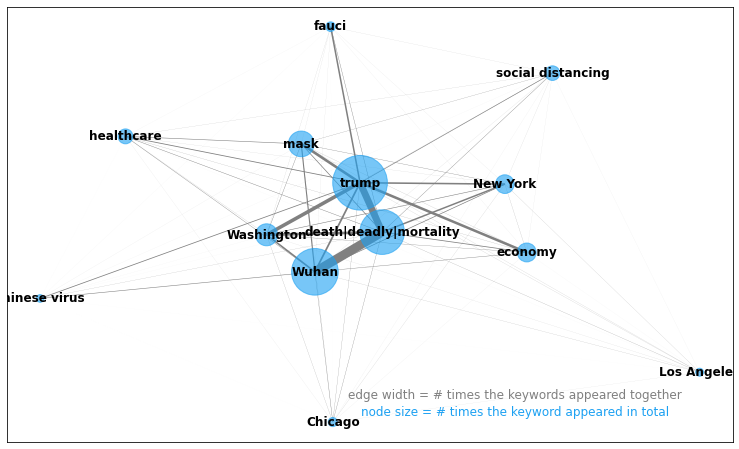

In [291]:
import matplotlib.pyplot as plt
G = nx.from_pandas_adjacency(key_combinations)
weights = [elem[2]/800 for elem in list(G.edges.data("weight"))]
pos = nx.spring_layout(G, scale = 6,iterations=100)
node_labels = G.nodes()

graph, ax = plt.subplots(figsize=(13,8))

nodes = nx.draw_networkx_nodes(G, pos, node_color = twittercol, alpha = 0.6, node_size= [elem/18 for elem in list(total_counts)])
edges = nx.draw_networkx_edges(G,pos,
                    width=weights, edge_color = "grey")
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight= "bold")

ax.text(
    0.70,
    0.10,
    "edge width = # times the keywords appeared together",
    horizontalalignment="center",
    transform=ax.transAxes,
    color = "grey",
    fontsize = 12
)
ax.text(
    0.70,
    0.06,
    "node size = # times the keyword appeared in total",
    horizontalalignment="center",
    transform=ax.transAxes,
    color = twittercol,
    fontsize = 12
)

plt.show()

In [262]:
# attempt at using nx_altair to make it interactive
# isnt really working, because nx_altair is SHIT. Cant even draw labels

G = nx.from_pandas_adjacency(key_combinations)
pos = nx.spring_layout(G, iterations=100)
weights = [elem[2]/1000 for elem in list(G.edges.data("weight"))]

#nx.set_node_attributes(G, total_counts)

nxa.draw_networkx(
    G, pos=pos,
    
    #cmap='viridis',
    width='weight',
    edge_color="black",
    node_color = twittercol,
    node_tooltip = ["name", "total tweets"]
)
viz

alt.LayerChart(...)

# Visualize keywords over time

collect possible visualizations over time

In [36]:
columns1 = list(keyword_data.columns)[1:]
columns2 = list(merged_3.columns)[1:]
select_box1 = alt.binding_select(options=columns1, name='Keyword')
sel1 = alt.selection_single(fields=['column'], bind=select_box1, init={'column': 'social distancing'})
select_box2 = alt.binding_select(options=columns2, name='Compare to value')
sel2 = alt.selection_single(fields=['column'], bind=select_box2, init={'column': 'new_cases'})


In [38]:
keyword_data.info()

base = alt.Chart(key_merged).encode(
    alt.X('date:T', axis=alt.Axis(title=None))
).properties(
    width=500,
    height=200
)

line_one = base.transform_fold(
    columns1,
    as_=['column', 'value']
).transform_filter(
    sel1
).mark_line( interpolate='monotone', stroke='#eb34eb').encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="Keyword appearances", titleColor='#eb34eb'))
).add_selection(
    sel1
)


line_two = base.transform_fold(
    columns2,
    as_=['column', 'value']
).transform_filter(
    sel2
).mark_line( interpolate='monotone', stroke='#1da1f2').encode(
    alt.Y('value:Q',
          axis=alt.Axis(title="Data value", titleColor='#1da1f2'))
).add_selection(
    sel2
)

alt.layer(line_one, line_two).resolve_scale(
    y = 'independent'
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    80 non-null     datetime64[ns]
 1   trump                   80 non-null     int64         
 2   social distancing       80 non-null     int64         
 3   Wuhan                   80 non-null     int64         
 4   chinese virus           80 non-null     int64         
 5   New York                80 non-null     int64         
 6   Los Angeles             80 non-null     int64         
 7   Chicago                 80 non-null     int64         
 8   Washington              80 non-null     int64         
 9   mask                    80 non-null     int64         
 10  economy                 80 non-null     int64         
 11  healthcare              80 non-null     int64         
 12  fauci                   80 non-null     int64        

alt.LayerChart(...)

# Load data of trending topics from github

selecting the fifty most talked about trending topics on twitter

manually annotate the wider topic the trend belongs to (C: Coronavirus, P: Politics, D: Tweets related to a special day of the week/year, O: Other topics)



In [ ]:
#trending = pd.read_csv("trending_topics_usa.csv")

trending = pd.read_csv("https://raw.githubusercontent.com/xxz-jessica/COVID-19_UCD_Challenge/master/Twitter_Trending_Topics/usa_trending.csv", encoding='latin1')
trending["date"] = pd.to_datetime(trending["date"])


trending_counted = trending.groupby('trending')['date'].apply(list).reset_index(name='dates')
trending_counted2 = trending.groupby("trending").count().reset_index()

#trending_counted = trending_counted.sort_values("num_dates", ascending = False)

#trending_counted.merge(trending_counted2, left_on =)

trending_selected = trending_counted.merge(trending_counted2).sort_values("date", ascending = False)

trending_selected = trending_selected[0:50]

trending_selected["annotation"] = ["P", "C", "O", "O", "C", "P", "P", "C", "P", "P", "D", "D", "O", "D", "D", 
                                    "D", "O", "D", "O", "P", "D", "C", "P", "D", "C", "P", "C", "P", "O", "O",
                                    "P", "P", "O", "C", "O", "O", "O", "D", "P", "O", "P", "P", "D", "C", "P", 
                                    "P", "P", "P", "D", "P"]


# Create wordcloud using brunel

In [ ]:
import brunel

In [ ]:
trending_select
%brunel cloud data("trending_selected") size(date) label(trending) tooltip(dates) color(annotation)